# Prepare simulations

In [1]:
import numpy as np
import glob, os, sys
import matplotlib.pyplot as plt
import pickle
import MDAnalysis
from MDAnalysis.analysis import rdf
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_2850/1786770179.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
sims={}
sims['2000']=[250,255,260,265,270]
sims['4000']=[250,255,260,265,270]
sims['6000']=[255,260,265,270,275]
sims['8000']=[255,260,265,270,275]

### Make simulation folders

In [14]:
for p in sims.keys():
   # pbar=P_bar[i]
    for t in sims[p]:
        fold='IceIII_{}atm_{}K'.format(p,t)
        os.system('cp -r IceIII {}'.format(fold))
        cmd='sed -i  "s#variable .* pressure .*#variable        pressure equal {}#g" {}/in.pressure\n'.format(p,fold)
        cmd+='sed -i  "s#variable.*temperature equal.*#variable        temperature equal {}#g" {}/in.temp'.format(t,fold)
        os.system(cmd)

sed: 1: "IceIII_2000atm_250K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_250K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_255K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_255K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_260K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_260K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_265K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_265K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_270K/in. ...": invalid command code I
sed: 1: "IceIII_2000atm_270K/in. ...": invalid command code I
sed: 1: "IceIII_4000atm_250K/in. ...": invalid command code I
sed: 1: "IceIII_4000atm_250K/in. ...": invalid command code I
sed: 1: "IceIII_4000atm_255K/in. ...": invalid command code I
sed: 1: "IceIII_4000atm_255K/in. ...": invalid command code I
sed: 1: "IceIII_4000atm_260K/in. ...": invalid command code I
sed: 1: "IceIII_4000atm_260K/in. ...": invalid command code I
sed: 1: 

In [15]:
!jupyter nbconvert --to script PrepareCoexistence.ipynb

^C
Traceback (most recent call last):
  File "/Users/sigbjobo/miniforge3/bin/jupyter-nbconvert", line 7, in <module>
    from nbconvert.nbconvertapp import main
  File "/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/nbconvert/__init__.py", line 4, in <module>
    from .exporters import *
  File "/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/nbconvert/exporters/__init__.py", line 1, in <module>
    from .base import (export, get_exporter,
  File "/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/nbconvert/exporters/base.py", line 15, in <module>
    from nbformat import NotebookNode
  File "/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/nbformat/__init__.py", line 32, in <module>
    from .validator import validate, ValidationError
  File "/Users/sigbjobo/miniforge3/lib/python3.9/site-packages/nbformat/validator.py", line 12, in <module>
    from .json_compat import get_current_validator, ValidationError
  File "/Users/sigbjobo/miniforge3/lib/python3.9/site

In [3]:
def extract_form_log(fn):
    lines=open(fn,'r').readlines()
    start=np.where([('Step' in l) for l in lines])[-1][0]
    data={keyi.lower(): []  for keyi in lines[start].split()}
    for l in lines[start+1:]:
        ls=l.split()
        try:
            if ls[0].isdigit():
                for i, key in enumerate(data.keys()):
                    data[key].append(float(ls[i]))
        
            else:
                break
        except:
            break
    for key in data.keys():
        data[key]=np.array(data[key])
    return data

In [4]:
sims=dict()
for f in glob.glob('*_*/log.lammps'):
    try:
        sims[f.replace('/log.lammps','')]=extract_form_log(f)
    except:
        pass

with open('ice.pickle', 'wb') as handle:
    pickle.dump(sims, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('ice.pickle', 'rb') as handle:
    sims = pickle.load(handle)
print(sims.keys())

dict_keys(['IceIII_4000atm_250K', 'IceIII_2000atm_265K', 'IceIII_6000atm_260K', 'IceIII_6000atm_270K', 'IceIII_4000atm_260K', 'IceIII_2000atm_255K', 'IceIII_8000atm_270K', 'IceIII_8000atm_260K', 'IceIII_4000atm_270K', 'IceIII_4000atm_255K', 'IceIII_6000atm_265K', 'IceIII_2000atm_260K', 'IceIII_6000atm_275K', 'IceIII_2000atm_270K', 'IceIII_8000atm_255K', 'IceIII_8000atm_275K', 'IceIII_4000atm_265K', 'IceIII_6000atm_255K', 'IceIII_2000atm_250K', 'IceIII_8000atm_265K'])


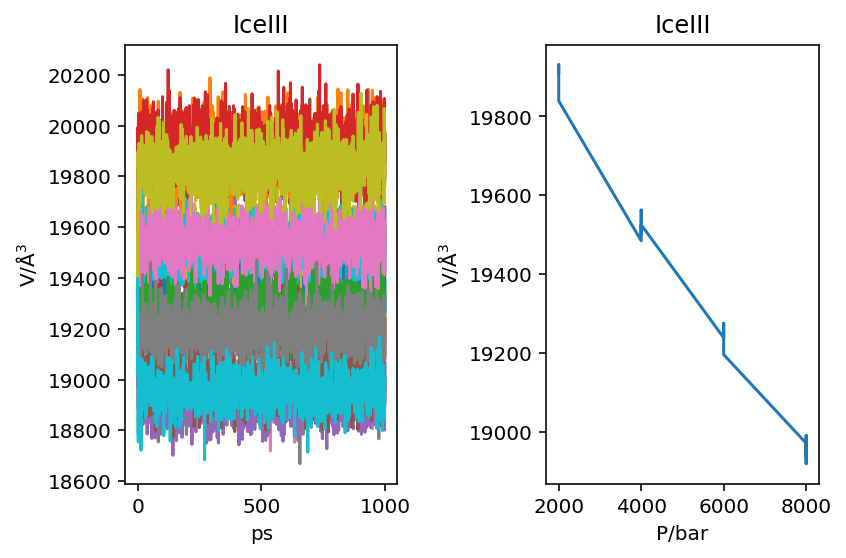

In [5]:
NIGNORE=int(250/(2./1000)/(500))


plt.subplot(121)
plt.title('IceIII')
vol_ice=[]
for key in sims.keys():
    ls=key.split('_')
    p=float(ls[1].replace('atm',''))
    t=float(ls[2].replace('K',''))
    if 'IceIII' in key:
        sim=sims[key]
        vol_ice.append([p,np.mean(sim['volume'][NIGNORE:])])
        try:
            plt.plot(sim['step']*2/1000,sim['volume'],label=key)
        except:
            pass
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
#plt.xlim([0,100])
plt.subplot(122)
plt.title('IceIII')
vol_ice=np.array(vol_ice)
vol_ice=vol_ice[np.argsort(vol_ice[:,0])]
plt.plot(vol_ice[:,0],vol_ice[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.tight_layout()

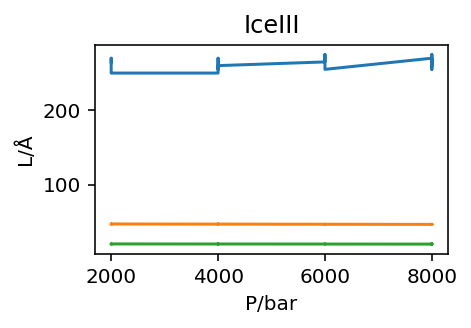

In [6]:


plt.subplot(121)
plt.title('IceIII')
box_IceIII=[]
for key in sims.keys():
    ls=key.split('_')
    p=float(ls[1].replace('atm',''))
    t=float(ls[2].replace('K',''))
    if 'IceIII' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['cella'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['cellb'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['cellc'][NIGNORE:])

        box_IceIII.append([p,t,np.mean(sim['cella'][NIGNORE:]),
                         np.mean(sim['cellb'][NIGNORE:]),
                         np.mean(sim['cellc'][NIGNORE:]),
                         np.mean(sim['cellalpha'][NIGNORE:]),
                         np.mean(sim['cellbeta'][NIGNORE:]),
                         np.mean(sim['cellgamma'][NIGNORE:])])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(221)
plt.title('IceIII')
box_IceIII=np.array(box_IceIII)
box_IceIII=box_IceIII[np.argsort(box_IceIII[:,0])]
plt.plot(box_IceIII[:,0],box_IceIII[:,1:4])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')

plt.tight_layout()


In [14]:
with open('avg_IceIII_box.dat','w') as fp_out:
    for val in box_IceIII:
        fp_out.write('{:8}{:8}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}\n'.format(val[0],val[1],val[2],val[3],val[4],val[5],val[6],val[7]))
!cat avg_IceIII_box.dat

  2000.0   265.0    47.027    20.141    21.023      90.0      90.0      90.0
  2000.0   270.0    47.038    20.152    21.027      90.0      90.0      90.0
  2000.0   260.0      47.0    20.134    21.013      90.0      90.0      90.0
  2000.0   255.0     46.99    20.128    21.001      90.0      90.0      90.0
  2000.0   250.0    46.973    20.116    20.996      90.0      90.0      90.0
  4000.0   250.0    46.772    20.032    20.797      90.0      90.0      90.0
  4000.0   265.0    46.806    20.054     20.82      90.0      90.0      90.0
  4000.0   270.0    46.849    20.058    20.818      90.0      90.0      90.0
  4000.0   255.0    46.782    20.036    20.805      90.0      90.0      90.0
  4000.0   260.0    46.803    20.045    20.812      90.0      90.0      90.0
  6000.0   265.0    46.608    19.969    20.672      90.0      90.0      90.0
  6000.0   275.0     46.66     19.98    20.676      90.0      90.0      90.0
  6000.0   270.0    46.625    19.975     20.67      90.0      90.0      90.0

In [26]:
os.system('mkdir -p COEX_BOXES/')
for b in box_IceIII:
    u=MDAnalysis.Universe('230K-3000atm/water.data.equil',format='data',in_memory=True)
    
    dim_new=b[2:]
    max_dim=np.where(dim_new==max(dim_new[:3]))[0][0]
    dim_new[max_dim]=u.dimensions[max_dim]    
    for i in range(3):
        u.atoms.positions[:][i]=u.atoms.positions[:][i]*dim_new[i]/u.dimensions[i]
    u.dimensions=dim_new
    
    u.atoms.write('COEX_BOXES/{}atm_{}K.data'.format(b[0],b[1]))

dict_items([('bond', <TopologyGroup containing 1512 bonds>), ('angle', <TopologyGroup containing 756 angles>), ('dihedral', <TopologyGroup containing 0 dihedrals>), ('improper', <TopologyGroup containing 0 impropers>)])
bond ['1']
angle ['1']
dihedral []
improper []
dict_items([('bond', <TopologyGroup containing 1512 bonds>), ('angle', <TopologyGroup containing 756 angles>), ('dihedral', <TopologyGroup containing 0 dihedrals>), ('improper', <TopologyGroup containing 0 impropers>)])
bond ['1']
angle ['1']
dihedral []
improper []
dict_items([('bond', <TopologyGroup containing 1512 bonds>), ('angle', <TopologyGroup containing 756 angles>), ('dihedral', <TopologyGroup containing 0 dihedrals>), ('improper', <TopologyGroup containing 0 impropers>)])
bond ['1']
angle ['1']
dihedral []
improper []
dict_items([('bond', <TopologyGroup containing 1512 bonds>), ('angle', <TopologyGroup containing 756 angles>), ('dihedral', <TopologyGroup containing 0 dihedrals>), ('improper', <TopologyGroup contai